# Module 1 Python Practice: Anscombe's Quartet

In this practice, we will recreate the Anscombe's Quartet visualization in Python. This is the statistics and the graphics we have seen in the lab. 


<img src="../images/AnscombeStats.png">

<img src="../images/AnscombeGraph.png">

We will use the **`plotnine`** library which is a good implementation of `ggplot2` in Python.  

In [1]:
from plotnine import *
import pandas as pd

#read the anscombe dataset
anscombe = pd.read_csv("/dsa/data/all_datasets/anscombe.csv")

# the same data set also comes with the seaborn library, we can just load it to the workspace
import seaborn as sns


anscombe2 = sns.load_dataset('anscombe')

In [2]:
# let's look at the data itself
anscombe

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


In [3]:
# sns version is slightly different 
anscombe2

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [4]:
#Now let's look at the statistics: we can utilize the `dataset` column in the sns version
grouped = anscombe2.groupby('dataset')
grouped.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [5]:
# correlation
grouped.apply(lambda df: df['x'].corr(df['y']))

dataset
I      0.816421
II     0.816237
III    0.816287
IV     0.816521
dtype: float64

In [6]:
# variance
grouped['y'].var()

dataset
I      4.127269
II     4.127629
III    4.122620
IV     4.123249
Name: y, dtype: float64

In [7]:
# linear regression (first pair)
import numpy as np
from scipy import stats

group1 = grouped.get_group('I')
x = group1['x'].values
y = group1['y'].values
slope, intercept, _,_,_ = stats.linregress(x, y)
print("dataset I slope: {:.4f}, intercept: {:.4f}".format(slope, intercept))


dataset I slope: 0.5001, intercept: 3.0001


In [8]:
# linear regression (second pair)
group2 = grouped.get_group('II')
x = group2['x'].values
y = group2['y'].values
slope, intercept, _,_,_ = stats.linregress(x, y)
print("dataset II slope: {:.4f}, intercept: {:.4f}".format(slope, intercept))

dataset II slope: 0.5000, intercept: 3.0009


### Now, it's your turn: Find the linear regression coefficients for the next two data sets:

In [12]:
# linear regression (next two pairs)
group3 = grouped.get_group('III')
x = group3['x'].values
y = group3['y'].values
slope, intercept,_,_,_ = stats.linregress(x,y)
print("dataset III slope: {:.4f}, intercept: {:.4f}".format(slope, intercept))


group4 = grouped.get_group('IV')
x = group4['x'].values
y = group4['y'].values
slope, intercept,_,_,_ = stats.linregress(x,y)
print("dataset IV slope: {:.4f}, intercept: {:.4f}".format(slope, intercept))


dataset III slope: 0.4997, intercept: 3.0025
dataset IV slope: 0.4999, intercept: 3.0017


**Let's do the same plots as in the R practice notebook**

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


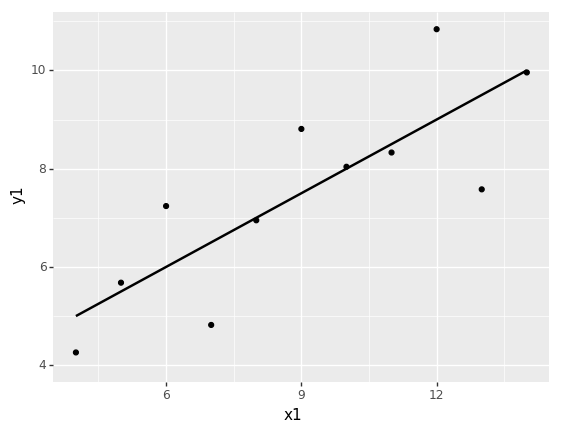

<ggplot: (8739411651094)>

In [13]:
p1 = ggplot(anscombe,aes(x="x1", y="y1"))
p1 = p1 + geom_point()
p1 = p1 + stat_smooth(method= 'lm', se=False) + expand_limits(x=4, y=4)
p1

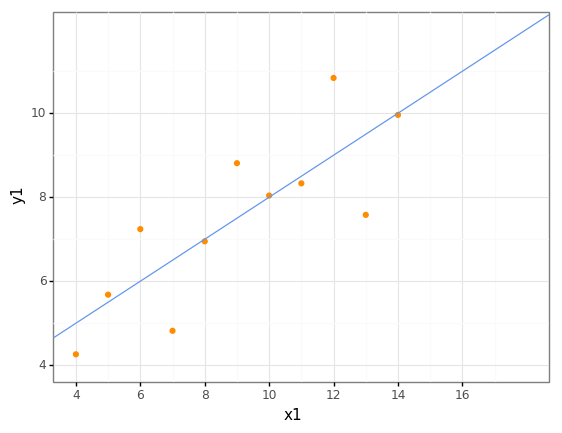

<ggplot: (8739411531731)>

In [14]:
# Here is the version with similar visuals as in the original plot from the lab notebook:
pp1 = ggplot(anscombe) + geom_point(aes(x="x1",y= "y1"), color = "darkorange")
pp1 = pp1 + theme_bw() + scale_x_continuous(breaks = range(0,18,2))
pp1 = pp1 + scale_y_continuous(breaks = range(0, 12, 2))
pp1 = pp1 + geom_abline(intercept = 3, slope = 0.5, color = "cornflowerblue")
pp1 = pp1 + expand_limits(x=[4,18], y=[4,12])
pp1


Since we do not have the gridding library in Python, we can use the `facet_wrap()` function utilizing the dataset column of the sns version of the data set. 

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


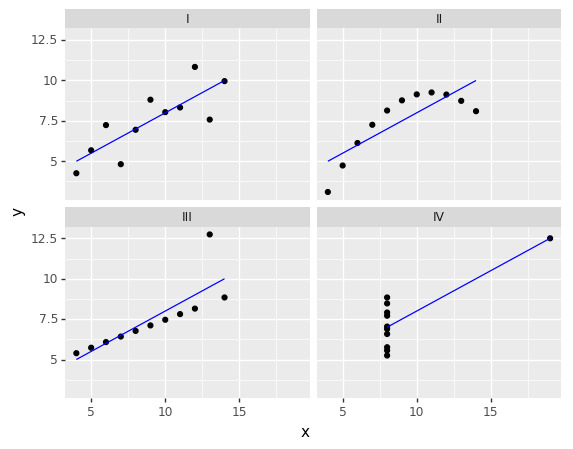

<ggplot: (-9223363297443171128)>

In [15]:
pp12 = (ggplot(anscombe2, aes('x', 'y'))
 + geom_point()
 + stat_smooth(method='lm', se=False, color='blue',size=0.5)
 + facet_wrap('~dataset'))

pp12

And the original look: 

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


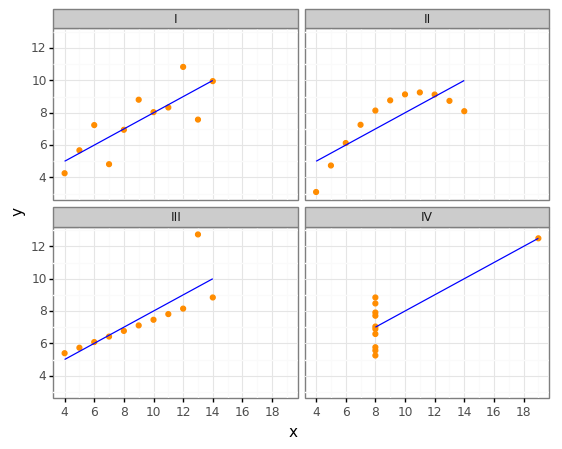

<ggplot: (-9223363297508485148)>

In [16]:
(ggplot(anscombe2, aes('x', 'y'))
 + geom_point(color='darkorange')
 + theme_bw()
 + scale_y_continuous(breaks=[y for y in range(0,13,2)])
 + scale_x_continuous(breaks=[x for x in range(0,19,2)])
 + stat_smooth(method='lm', se=False, color='blue',size=0.5)
 + facet_wrap('~dataset'))